# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [5]:
#dataset de referencia 



#dataset de referencia 
ompm = DataSet('ualm2.h5')




elec=ompm.buildings[1].elec # Todos los medidores

print (elec)

labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fryer', 'LED Lamp',  'Incandescent lamp','Laptop Computer', 'Fan']})


Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)


## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [6]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2023-02-24 14:47:10.508000+01:00', end='2023-02-24 20:03:54.554000+01:00', empty=False)

Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [7]:


next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity,voltage,current,power,pf,frequency
type,,,active,,
2023-02-24 14:47:10+01:00,244.828568,0.310000,74.735718,1.000000,50.000000
2023-02-24 14:47:20+01:00,244.273331,0.306667,74.419998,1.000000,50.000000
2023-02-24 14:47:30+01:00,244.778564,0.310000,74.642853,1.000000,50.000000
2023-02-24 14:47:40+01:00,245.713333,0.310000,75.059998,1.000000,50.000000
2023-02-24 14:47:50+01:00,245.542862,0.310000,74.928574,1.000000,50.000000
...,...,...,...,...,...
2023-02-24 20:03:10+01:00,245.515381,0.110000,15.353846,0.575385,50.000000
2023-02-24 20:03:20+01:00,245.446152,0.110000,15.353846,0.576154,49.992310
2023-02-24 20:03:30+01:00,245.130768,0.110000,15.330770,0.576923,49.961540


Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [8]:


next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity,voltage,current,power,pf,frequency
type,,,active,,
2023-02-24 14:47:10+01:00,245.000000,0.31,74.800003,1.00,50.000000
2023-02-24 14:47:20+01:00,244.300003,0.31,74.500000,1.00,50.000000
2023-02-24 14:47:30+01:00,244.699997,0.31,74.599998,1.00,50.000000
2023-02-24 14:47:40+01:00,245.399994,0.31,74.900002,1.00,50.000000
2023-02-24 14:47:50+01:00,245.600006,0.31,75.000000,1.00,50.000000
...,...,...,...,...,...
2023-02-24 20:03:10+01:00,245.699997,0.11,15.400000,0.58,50.000000
2023-02-24 20:03:20+01:00,245.399994,0.11,15.400000,0.58,50.000000
2023-02-24 20:03:30+01:00,245.199997,0.11,15.300000,0.58,50.000000


# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

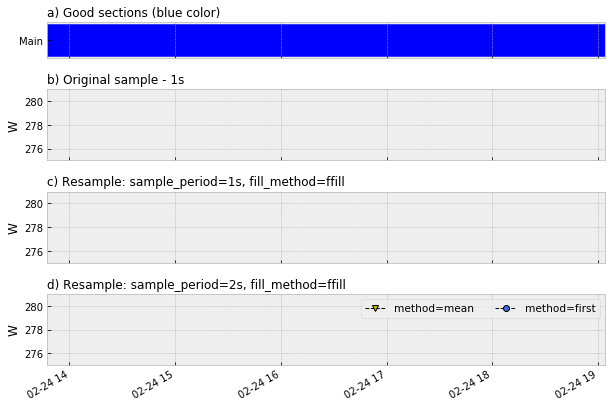

In [9]:
rcParams['figure.figsize'] = (10, 7)


#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data().plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')

ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'}).plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')

ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'}).plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'}).plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')


#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [10]:
Devices=elec.select(instance=[2,3,4,5,6]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])nstance=1)])])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [11]:
Devices = elec.select(instance=[2,3,4,5,6])
Devices.select_top_k(k=5)

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])nstance=1)])])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [14]:
train = DataSet('ualm2.h5')


train.set_window(start="2023-02-24 14:17:10", end="2023-02-24 17:40:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2023-02-24 14:47:10.508000+01:00', end='2023-02-24 17:40:00+01:00', empty=False)

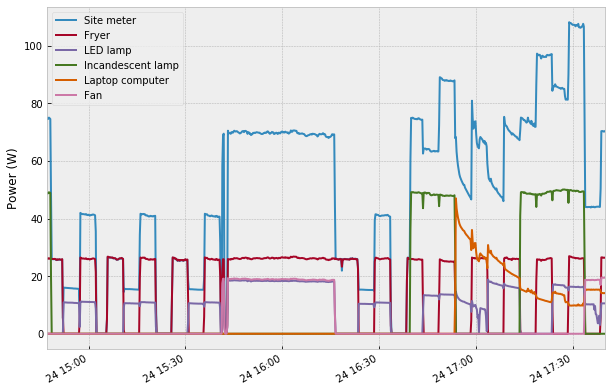

In [15]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [16]:
 #Validación 

valid = DataSet('ualm2.h5')

valid.set_window(start="2023-02-24 17:40:01", end="2023-02-24 18:51:27")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2023-02-24 17:40:01+01:00', end='2023-02-24 18:51:27+01:00', empty=False)

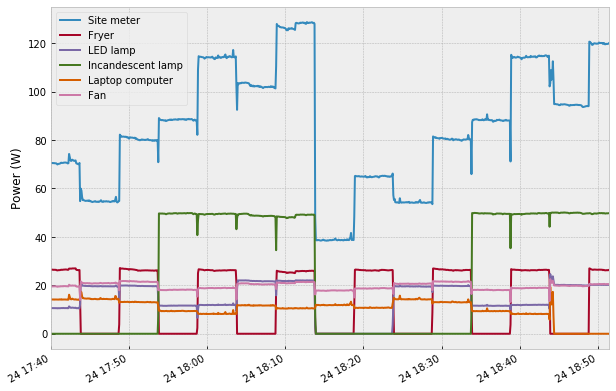

In [17]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [18]:
test = DataSet('ualm2.h5') #Pruebas

test.set_window(start="2023-02-24 18:51:28", end="2023-02-24 20:03:54")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2023-02-24 18:51:28+01:00', end='2023-02-24 20:03:54+01:00', empty=False)

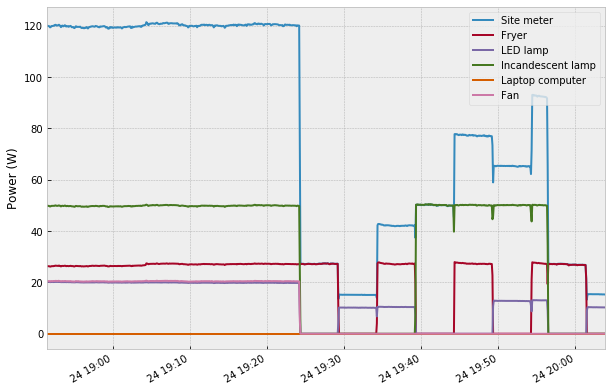

In [19]:
test_elec.mains().plot()
test_elec.submeters().plot()